#**Business Understanding:**

##**Overview:**

Coupon systems have been widely used to market products, and services and
engage customers to use their products and services often. Coupons create a win-win situation for both companies and customers so, by offering a correct coupon to users, which can lead users to become frequent customers and it is enhancing a brand’s impact on its customers.

How to know which coupon to provide a customer can be a rather complex task, since each customer profile responds differently to each other, and frequently offering them bad coupons or deals might drag them away from your business. To overcome this problem, machine learning techniques can be used to build a better coupon recommendations system.



##**Business Objective:**

Predicting whether the customer will accept the coupon or not is a difficult problem, and we can not just recommend it to everyone because of the costs concerned so, in this problem, we will predict whether a customer will accept or reject the offered coupon based on the customer’s profile and history.

This prediction helps the company in offering a correct coupon so that more customers will use their services which leads to more business for the company.



##**DS Objective:**

The goal of the prediction problem is to predict whether a customer will
accept or reject the coupon for a specific venue based on demographic and contextual attributes. If the customers accept the coupon are labeled as Y=1 and if the customers reject the coupon are labeled as Y=0. This problem can be posed as a binary class classification problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,pointbiserialr
from scipy.stats.contingency import association
import plotly.express as px

df = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## **Explanation of Dataset attributes/features**:
### **User attributes**:
>__1. Gender:__ Female, Male<br>
>__2. Age:__ 21, 46, 26, 31, 41, 50plus, 36, below21<br>
>__3. Marital Status:__ Unmarried partner, Single, Married partner, Divorced, Widowed<br>
>__4. has_Children:__ 1: has children, 0: No children<br>
>__5. Education:__ Some college — no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School<br>
>__6. Occupation:__ unique 25 number of occupation of users (Unemployed, Architecture & Engineering, Student,Education&Training&Library, Healthcare Support,Healthcare Practitioners & Technical, Sales & Related, Management,Arts Design Entertainment Sports & Media, Computer & Mathematical,Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry)<br>
>__7. Income:__ income of user (Less than \\\$12500, \\\$12500 — \\\$24999, \\\$25000 — \\\$37499, \\\$37500 — \\\$49999, \\\$50000 — \\\$62499, \\\$62500 — \\\$74999, \\\$75000 — \\\$87499, \\\$87500 — \\\$99999, \\\$100000 or More)<br>
>__8. Car :__ Description of vehicle which driven by user (Scooter and motorcycle, crossover, Mazda5) (99% of values are missing in this feature)<br>
>__9. Bar:__ how many times does the user go to a bar every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
>__10. CoffeeHouse:__ how many times does the user go to a coffeehouse every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
>__11. CarryAway:__ how many times does the user get take-away food every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
>__12. RestaurantLessThan20:__ how many times does the user go to a restaurant with an average expense per person of less than \\\$20 every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
>__13. Restaurant20To50:__ how many times does the user go to a restaurant with average expense per person of \\\$20 — \\\$50 every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br>
### **Contextual attributes**:
>__1. Destination:__ destination of user (No Urgent Place, Home, Work)<br>
>__2. Passenger:__ who are the passengers in the car (Alone, Friend(s), Kid(s), Partner)<br>
>__3. Weather:__ weather when user is driving (Sunny, Rainy, Snowy)<br>
>__5. Time:__ time when user driving (2PM, 10AM, 6PM, 7AM, 10PM)<br>
>__6. toCoupon_GEQ5min:__ driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)<br>
>__7. toCoupon_GEQ15min:__ driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)<br>
>__8. toCoupon_GEQ25min:__ driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)<br>
>__9. direction_same:__ whether the restaurant/cafe/bar is in the same direction as user’s current destination (0,1)<br>
>__10. direction_opp:__ whether the restaurant/cafe/bar is in the opposite direction as user’s current destination (0,1)<br>
### **Coupon attributes**:
>__1. Coupon:__ coupon type offered by company (Restaurant(<\\\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\\$20-\\\$50)). Here, <\\\$20 is the average pay per user in a not too expensive restaurant, Restaurant(\\\$20-\\\$50) means the average pay per user is between \\\$20 to \\\$50 which little bit expensive restaurant.<br>
>__2. Expiration:__ coupon expires in 1 day or in 2 hours (1d, 2h)<br>
### **Target attribute**:
>__1. Y:__ whether the coupon is accepted or rejected, 1:accepted, 0:rejected

In [4]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

#**Exploratory Data Analysis (EDA)**

In [6]:
y = df['Y'].value_counts()

px.bar(x = y.index , y = y, title = 'Y Value', width = 600, height = 400, color = y.index)

##Observation:
* The frequency of the Y data is unbalanced.
* However, the imbalance is not severe, so we can either oversample or use the original data to see if the data affects the performance of the model.



In [7]:
numeric_cols = df.select_dtypes(include = 'number').columns.to_list()
fig = make_subplots(rows= 2 , cols=4, subplot_titles = numeric_cols)

for index,col in enumerate(numeric_cols):
  fig.add_trace(
      go.Histogram(x = df[col]), row = index %2 + 1 , col = index //2 + 1
  )

fig.update_layout(height=800, width=1200, title_text="Numeric Value Analysis")
fig.show()

##Observation:
* Most of the numeric value in the dataset have 2 numeric value that consists 1 or 0, except the temperature.

#**🌤 Weather**

In [8]:
val_counts_weather = df['weather'].value_counts()

val_counts_weather_with_y = df.groupby(['weather','Y']).size().reset_index(name="counts")


px.pie(names = val_counts_weather.index, values = val_counts_weather, title = 'Weather Frequency', width = 800, height = 600)

In [9]:
# checking the correlation to the target variable with the chi square.
# if the p-value is under 0.05, the correlation to the target variable is statistically significant.
def check_correlation(df,col,target_col):
  contigency = pd.crosstab(df[col],df[target_col])
  res = chi2_contingency(contigency)
  print(f"{col} - {target_col} : ", 'Correlated 'if res[1] < 0.05  else 'Not Correlated', ',',res[1])

# count probability acceptance to the column.
def probability(df, col):
  yes_man = df.loc[(df['Y'] == 1), col].value_counts()
  value_counts = df[col].value_counts()

  val_index = value_counts.index

  ratio_yes = yes_man / value_counts

  return  val_index, ratio_yes*100

# show the distribution of the column and its probability
def show_dist_prob(df, col):
  idx_occ, prob_occ = probability(df, col)

  occ_val_counts = df[col].value_counts()

  fig = make_subplots(cols=2, rows=1, subplot_titles=['Value Counts', 'Acceptance Probability'], shared_yaxes=True)

  fig.add_trace(
      go.Bar(x=occ_val_counts, y=occ_val_counts.index, orientation='h'),
      row=1, col=1
    )

  fig.add_trace(
      go.Bar(x=prob_occ, y=idx_occ, orientation='h'),
      row=1, col=2
    )

  fig.update_layout(title=col, width=800, height=600)

  fig.show()

In [10]:
index, ratio_weather = probability(df,'weather')

fig = px.bar(x = index , y = ratio_weather , title = 'Probability of True Value Based on Coupon Acceptance and Weather', width = 800, height = 600)
fig.show()
check_correlation(df.copy(),'weather','Y')

weather - Y :  Correlated  , 8.312207740720093e-31


##Observation:
* The probability of sunny weather to coupon acceptance is 60%. It means, if we give the coupon to on the sunny weather, the acceptance is probably high.

# **⏮ Same Vs Opposite Direction ⏭**

In [11]:
fig = make_subplots(rows= 1 , cols= 2, subplot_titles = ['same direction', 'opposite'])

same_idx, same_val = probability(df.copy(),'direction_same')
opp_idx, opp_val = probability(df.copy(),'direction_opp')

print(pd.crosstab(df['direction_same'], df['Y']))

fig.add_trace(
    go.Bar(x = opp_idx, y = opp_val), row = 1 , col = 1
)

fig.add_trace(
    go.Bar(x = same_idx, y = same_val), row = 1, col = 2
)

fig.update_layout(height=400, width=600, title_text="Same vs opposite probability to the coupon acceptance")
fig.show()
check_correlation(df,'direction_same','Y')
check_correlation(df,'direction_opp','Y')

Y                  0     1
direction_same            
0               4336  5624
1               1138  1586


direction_same - Y :  Not Correlated , 0.10541990881286277
direction_opp - Y :  Not Correlated , 0.10541990881286277


## Observation:
* Based on the contigency table and probability analysis, the frequency between same direction and opposite dirrection to the coupon acceptance (Y) is slightly different.
* In addition, Both of the variable are not statisticaly correlated with the coupon acceptance.

# **⏲ Time and Expire Day**

In [12]:
time_idx, time_prob = probability(df.copy(),'time')
expire_idx, expire_prob = probability(df.copy(),'expiration')

fig = make_subplots(rows= 1 , cols= 2, subplot_titles = ['Time', 'Expiration'])

fig.add_trace(
    go.Bar(x = time_idx, y = time_prob), row = 1 , col = 1
)

fig.add_trace(
    go.Bar(x = expire_idx, y = expire_prob), row = 1, col = 2
)

fig.update_layout(height=400, width=600, title_text="Probability to The Coupon Acceptance")
fig.show()

## Observation:
* The probability analysis shows that more people accept the voucher at 10:00 am, 6:00 pm, and peak at 2:00 pm.
* For Expiration, we see that more people accept the coupon when it expires in one day.

In [13]:
check_correlation(df.copy(),'time','Y')
check_correlation(df.copy(),'expiration','Y')

time - Y :  Correlated  , 8.37562170116935e-37
expiration - Y :  Correlated  , 2.2875426931245946e-48


* We also checked the correlation with chi-square and both of the two variables are statistically correlated with coupon acceptance.

# **💸 Job & income & education 🎓**


In [14]:
def income_output(df,li,col):

  temp_df = df[[col,'Y']].copy()
  temp_df['high_acc'] = temp_df[col].apply(lambda x : x in li)

  return temp_df

def descending_withThresh(prob,thresh):
  return prob.sort_values(ascending = False).iloc[:-thresh].index

def get_higher_variable(df,col):
  idx , prob = probability(df,col)
  thresh_result = {'p-value':[],'crammer_v':[]}
  thresh_li = [x for x in range(1,len(prob)+1)]

  desc_result = prob.sort_values(ascending = False)

  for i in thresh_li:
    high_acc = descending_withThresh(desc_result,i)


    df_res = income_output(df.copy(),high_acc,col)

    cont = pd.crosstab(df_res['high_acc'],df_res['Y'])

    correlation = chi2_contingency(cont)[1]
    assoc = association(cont,method = 'cramer')

    thresh_result['p-value'].append(correlation)
    thresh_result['crammer_v'].append(assoc)

  result_df = pd.DataFrame(thresh_result, index = thresh_li)
  result_df = result_df[result_df['p-value'] < 0.01]

  max_thresh_index = result_df[result_df['crammer_v'] == result_df['crammer_v'].max()].index[0]
  max_filtered = descending_withThresh(desc_result,max_thresh_index)

  return result_df , descending_withThresh(desc_result,max_thresh_index),desc_result[max_filtered]


## **Income**

In [15]:
show_dist_prob(df,'income')
check_correlation(df,'income','Y')

income - Y :  Correlated  , 4.30446851198096e-08


## Observation:
Based on the probability analysis, we see that
* The person with the very high income (87500) has the lowest acceptance probability.
* Otherwise, the person with a medium income (50000 - 62499) has the highest acceptance probability.
* The correlation with coupon acceptance (Y) seems to be statistically significant, since the chi-square p-value is under 0.05.

In addition,
* To filter which income has high probability to accept the coupon, we can use the threshold.
* The threshold is the index that we exclude in the probability series.
* The final threshold is choosen based on the strength of the correlation (crammer v).

In [16]:
result_df, acc_income, desc_income = get_higher_variable(df,'income')
result_df

/usr/local/lib/python3.10/dist-packages/scipy/stats/contingency.py:459: RuntimeWarning:

invalid value encountered in scalar divide



,p-value,crammer_v
1,2.118415e-07,0.046388
2,1.561199e-08,0.050442
3,4.614217e-10,0.055529
4,2.338202e-08,0.049756
5,8.804490e-07,0.043815
6,8.656964e-06,0.039661
7,1.959987e-04,0.033243


In [17]:
desc_income

income
$50000 - $62499     59.553948
$25000 - $37499     59.314456
Less than $12500    59.309021
$100000 or More     57.834101
$12500 - $24999     57.454943
$37500 - $49999     56.398892
Name: count, dtype: float64

## **Occupation**

In [18]:
show_dist_prob(df.copy(),'occupation')
check_correlation(df,'income','Y')

income - Y :  Correlated  , 4.30446851198096e-08


## Observation:
Based on the probability of each job,
* we see that there are some jobs with high probability of acceptance.
* The highest acceptance of the voucher goes to health care practitioners and technical.

In addition,
* the p-value of the chisquare is less than 0.05, which indicates that this column is statistically correlated with the acceptance of the coupon.

However, to easily determine the jobs with high acceptance, we can use the threshold as well as the income columns

In [19]:
job_df, acc_job, desc_job = get_higher_variable(df,'occupation')
job_df

/usr/local/lib/python3.10/dist-packages/scipy/stats/contingency.py:459: RuntimeWarning:

invalid value encountered in scalar divide



,p-value,crammer_v
1,6.125515e-07,0.044693
2,4.584956e-09,0.052391
3,1.450870e-10,0.057221
4,8.659544e-12,0.060860
5,4.804529e-14,0.067123
6,3.019403e-14,0.067655
7,2.612863e-14,0.067820
8,2.511262e-15,0.070427
9,1.465974e-15,0.071018
10,1.532376e-15,0.070965


In [20]:
desc_job

occupation
Healthcare Support                           69.834711
Construction & Extraction                    68.831169
Healthcare Practitioners & Technical         67.622951
Protective Service                           64.571429
Architecture & Engineering                   63.428571
Production Occupations                       61.818182
Student                                      61.047980
Office & Administrative Support              60.093897
Transportation & Material Moving             59.633028
Building & Grounds Cleaning & Maintenance    59.090909
Management                                   58.830549
Food Preparation & Serving Related           58.389262
Name: count, dtype: float64

# **🛍 Coupon**

In [21]:
show_dist_prob(df.copy(),'coupon')
check_correlation(df,'coupon','Y')

coupon - Y :  Correlated  , 8.575341747082738e-188


##Observation:
Based on the probability of acceptance,
* we see that the restaurant (< 20) and carry out & take away coupons have the highest probability (arround 70%).

Moreover,
* the correlation with the coupon acceptance is statistically correlated because the p-value is below 0.05.

# **Other Variables**

In [28]:
selected_col = ['age','gender','maritalStatus','has_children','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','destination','passanger']
fig = make_subplots(rows = 4, cols = 4, subplot_titles= selected_col)

for idx, col in enumerate(selected_col):
  val_counts = df[col].value_counts()
  fig.add_trace(
      go.Bar(x = val_counts.index, y = val_counts ), row = idx // 4 + 1 , col = idx % 4  + 1
  )

fig.update_layout(width = 1200, height = 1100, title = 'Others Variables distribution')
fig.show()

In [29]:
fig = make_subplots(rows = 4, cols = 4, subplot_titles= selected_col)

for idx, col in enumerate(selected_col):
  idx_prob, prob = probability(df,col)
  fig.add_trace(
      go.Bar(x = idx_prob, y = prob ), row = idx // 4 + 1 , col = idx % 4  + 1
  )

fig.update_layout(width = 1200, height = 1100, title = 'Coupon Acceptance Probability')
fig.show()


In [30]:
for col in selected_col :
  check_correlation(df,col,'Y')

age - Y :  Correlated  , 3.5221422366296096e-11
gender - Y :  Correlated  , 8.05552865589407e-07
maritalStatus - Y :  Correlated  , 6.489647983232487e-10
has_children - Y :  Correlated  , 3.1775773676508616e-07
toCoupon_GEQ5min - Y :  Not Correlated , 1.0
toCoupon_GEQ15min - Y :  Correlated  , 4.6359722947672643e-20
toCoupon_GEQ25min - Y :  Correlated  , 2.4662838393790205e-31
CoffeeHouse - Y :  Correlated  , 1.0794963990512695e-58
CarryAway - Y :  Correlated  , 1.5006376228356664e-08
RestaurantLessThan20 - Y :  Correlated  , 7.57454069770614e-05
Restaurant20To50 - Y :  Correlated  , 9.539081767804664e-14
destination - Y :  Correlated  , 8.40265678045787e-48
passanger - Y :  Correlated  , 7.284119805592145e-48


##Observation:
* The column toCoupon_GEQ5min has only one value and does not seem to be correlated with the Y-value.
* Therefore, we should drop this column.

# **Null Values**

In [31]:
def show_counts_and_null(col):
  print(df[col].value_counts())
  print('Null - value :',df[col].isna().sum(), df[col].isna().sum() * 100/len(df))

null_cols = df.isna().sum()
null_cols = null_cols[null_cols > 0].index
for col in null_cols :
  show_counts_and_null(col)
  print("\n")

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64
Null - value : 12576 99.14853358561967


Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
Null - value : 107 0.8435824660990224


CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
Null - value : 217 1.7108167770419427


CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
Null - value : 151 1.1904761904761905


RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Null - value : 130 1.0249132765689057


Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dty

## Observation:
* The car column has 99% null values. Therefore, we should drop the column.

# **Data Preparation**
### Drop Irrelevant Variables

In [32]:
droped_column = ['car','toCoupon_GEQ5min','direction_same','direction_opp']
new_df = df.drop(columns = droped_column)

In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

### Split Train and Test Dataset


In [35]:
from sklearn.model_selection import train_test_split

X = new_df.drop(columns = 'Y')
y = new_df.Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Filling Null Values

In [36]:
X_train = X_train.fillna('never')
X_test = X_test.fillna('never')

##Category Encoder and Feature Engineering

In [37]:
ordinal_encoder = {
    ('Restaurant20To50', 'RestaurantLessThan20', 'CarryAway', 'Bar', 'CoffeeHouse'): {
        'never': 1, 'less1': 2, '1~3': 3, '4~8': 4, 'gt8': 5
    },
    'gender': {
        'Male': 1, 'Female': 0
    },
    'expiration': {
        '1d': 1, '2h': 0
    },
    'time': {
        '7AM': 1, '10AM': 2, '2PM': 3, '6PM': 4, '10PM': 5
    },
    'education': {
        'Some High School': 1, 'High School Graduate': 2, 'Some college - no degree': 3,
        'Associates degree': 5, 'Bachelors degree': 6,'Graduate degree (Masters or Doctorate)':7
    },
    'income': {
        'Less than $12500': 1, '$12500 - $24999': 2, '$25000 - $37499': 3, '$37500 - $49999': 4,
        '$50000 - $62499': 5, '$62500 - $74999': 6, '$75000 - $87499': 7, '$87500 - $99999': 8,
        '$100000 or More': 10
    },
    'age': {
        'below21': 1, '21': 2, '26': 3, '31': 4, '36': 5, '41': 6, '46': 6, '50plus': 7
    }
}

encoding_hot_target = ['destination','passanger','weather','maritalStatus','coupon']

for data in [X_train, X_test]:
  data['high_job'] = data['occupation'].apply(lambda x : x in desc_job.index.to_list())
  data['high_income'] = data['income'].apply(lambda x : x in desc_income.index.to_list())

  for col in ordinal_encoder:
    if isinstance(col, tuple):
      for col_spec in col:
        data[col_spec] = data[col_spec].apply(lambda x: ordinal_encoder[col][x])
    else:
      data[col] = data[col].apply(lambda x: ordinal_encoder[col][x])

  summation = data[['Restaurant20To50','RestaurantLessThan20','CarryAway','Bar','CoffeeHouse']].sum(axis = 1, numeric_only = True)

  data['prop_res20'] = data['Restaurant20To50']/summation
  data['prop_resless20'] = data['RestaurantLessThan20']/summation
  data['prop_carry'] = data['CarryAway']/summation
  data['prop_CoffeeHouse'] = data['CoffeeHouse']/summation

  summ_res_bar = data[['Restaurant20To50','RestaurantLessThan20','Bar']].sum(axis = 1, numeric_only = True)

  data['freq_bar_15'] = ( data['toCoupon_GEQ15min'] + 1) / summ_res_bar
  data['freq_bar_25'] = ( data['toCoupon_GEQ25min'] + 1) / summ_res_bar

In [38]:
def one_hot_encoding(df,col_li):
  one_hot = pd.get_dummies(df[col_li])
  df = pd.concat([df,one_hot],axis = 1)
  df = df.drop(columns = col_li)
  return df

X_train = one_hot_encoding(X_train,encoding_hot_target)
X_test = one_hot_encoding(X_test,encoding_hot_target)

In [39]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [40]:
from category_encoders import MEstimateEncoder

def target_encoding(X_train,X_test,y_train,col):
  encoder = MEstimateEncoder()
  X_train[col] = encoder.fit_transform(X_train[col],y_train)
  X_test[col] = encoder.transform(X_test[col])
  return X_train,X_test

X_train,X_test = target_encoding(X_train,X_test,y_train,'occupation')

In [41]:
# renaming columns name

def rename(df):
  map = {
    'passanger_Friend(s)':'passanger_Friends',
    'passanger_Kid(s)' : 'passanger_Kids',
    'coupon_Carry out & Take away' : 'coupon_CarryOut_TakeAway',
    'coupon_Restaurant(<20)':'coupon_Restaurant20'
  }
  return df.rename(columns = map)

X_train = rename(X_train)
X_test = rename(X_test)

In [42]:
# setting random variable for feature selection

X_train['rand_int'] = np.random.random(size = len(X_train))
X_test['rand_int'] = np.random.random(size = len(X_test))

In [44]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.6 MB/s eta 0:00:00


In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from imblearn.over_sampling import SMOTE
from category_encoders import CatBoostEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,recall_score,precision_score,f1_score,balanced_accuracy_score,roc_auc_score,ConfusionMatrixDisplay

models = {
    'LR':LogisticRegression,
    'DecisionTree':DecisionTreeClassifier,
    'RandomForest':RandomForestClassifier,
    'GradientBoost':GradientBoostingClassifier,
    'ExtraTrees':ExtraTreesClassifier,
    'LGBM':LGBMClassifier,
    'Xgboost':XGBClassifier,
    'adaboost':AdaBoostClassifier,
    'sgd':SGDClassifier,
    'catboost':CatBoostClassifier,
}

In [50]:
def find_model(models_li,X_train,y_train,X_test,y_test):
  data_frame = {'acc':[],'recall':[],'precision':[],'roc_auc':[]}

  for model_key,model in models_li.items() :
    m = None
    if model_key == 'logit':
       m = make_pipeline(StandardScaler(),model(random_state = 212))
    elif model_key == 'sgd':
      m = make_pipeline(StandardScaler(),model(loss = 'log_loss',random_state = 212))
    else :
      m = model(random_state = 212)

    m.fit(X_train,y_train)
    y_pred = m.predict(X_test)
    y_pred_proba = m.predict_proba(X_test)[:,1]
    data_frame['acc'].append(balanced_accuracy_score(y_test,y_pred))
    data_frame['recall'].append(recall_score(y_test,y_pred))
    data_frame['precision'].append(precision_score(y_test,y_pred))
    data_frame['roc_auc'].append(roc_auc_score(y_test,y_pred_proba))
  return pd.DataFrame(data_frame,index = list(models_li.keys()))

In [51]:
result = find_model(models,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5801, number of negative: 4346
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 10147, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.571696 -> initscore=0.288774
[LightGBM] [Info] Start training from score 0.288774
Learning rate set to 0.02771
0:	learn: 0.6882656	total: 16ms	remaining: 16s
1:	learn: 0.6834399	total: 29.4ms	remaining: 14.6s
2:	learn: 0.6783317	total: 44.7ms	remaining: 14.8s
3:	learn: 0.6739582	total: 58.5ms	remaining: 14.6s
4:	learn: 0.6701867	total: 67ms	remaining: 13.3s
5:	learn: 0.6666332	total: 72ms	remaining: 11.9s
6:	learn: 0.6632035	total: 77.2ms	remain

In [52]:
result

,acc,recall,precision,roc_auc
LR,0.664726,0.777147,0.684375,0.719096
DecisionTree,0.656720,0.699077,0.693662,0.656720
RandomForest,0.727948,0.814053,0.739523,0.817767
GradientBoost,0.714298,0.820440,0.723404,0.780183
ExtraTrees,0.740096,0.819730,0.750975,0.811829
LGBM,0.734423,0.822569,0.743902,0.815828
Xgboost,0.735924,0.806955,0.750495,0.817883
adaboost,0.669597,0.762952,0.692209,0.728005
sgd,0.648392,0.716111,0.680837,0.698782
catboost,0.737261,0.824698,0.746307,0.827325


* This trial shows the Catboost is the best model with the high accuracy, recall, precision and AUC score.
* So, we select Catboost as a predictor to the test dataset.

In [53]:
val_counts_y = y_train.value_counts()

px.bar(x = val_counts_y.index , y = val_counts_y, width = 600, height = 600,title = 'Y Value Distribution')

In [54]:
r = SMOTE(random_state=42)

X_train_resample,y_train_resample = r.fit_resample(X_train,y_train)

## **Feature Importance**
* Let's find which variables have a great impact to the model based on the SHAP value.

In [55]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.0 MB/s eta 0:00:00


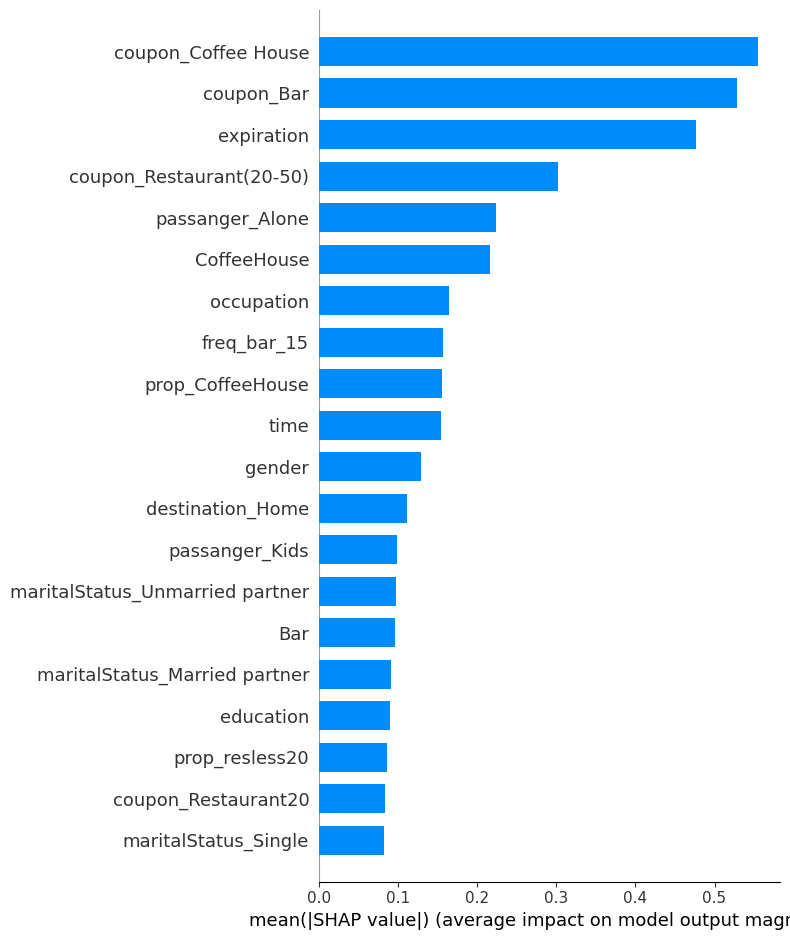

In [56]:
import shap

final_model = models['catboost'](logging_level = 'Silent',random_state =212)
final_model.fit(X_train_resample,y_train_resample)
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_train_resample)
shap.summary_plot(shap_values, X_train_resample, plot_type='bar')


### Observation
Based on the summary plot,
* it shows that expiration , coupon carry out and restaurant coupon less than 20 give the most impact on the model decision.

# **Feature selection strategy**
* To filter any important variables in the model, we can use random variable in the train dataset.
* So, we calculated the average SHAP value of each column, then we drop the columns which below to the random column SHAP value.

In [57]:
imp_value = pd.Series(np.mean(np.abs(shap_values),axis = 0),index = X_train_resample.columns).sort_values(ascending = False)
imp_value_li = imp_value[imp_value >  imp_value['rand_int']].index.to_list()

In [58]:
final_model = models['catboost'](logging_level = 'Silent',random_state = 212)

X_train_new  = X_train_resample[imp_value_li]
X_test_new = X_test[imp_value_li]

final_model.fit(X_train_new,y_train_resample)

y_pred= final_model.predict(X_test_new)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1128
           1       0.76      0.81      0.78      1409

    accuracy                           0.75      2537
   macro avg       0.75      0.75      0.75      2537
weighted avg       0.75      0.75      0.75      2537



### Observation:
* This feature selection and resampling works well on the test dataset.
* The accuracy of the model is increased by 1%.

In [59]:
y_pred_proba = final_model.predict_proba(X_test_new)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

cm = confusion_matrix(y_test,y_pred)

fig = px.imshow(cm , x = ['False Positive','True Positive'],y = ['True Negative','False Negative'],
                labels = dict(x = 'Predicted', y = 'True Value'),text_auto=True,width=700, height=500)

fig.update_layout(title = 'Confusion Matrix')

fig2 = px.line(x=fpr, y=tpr,labels=dict(x='False Positive Rate', y='True Positive Rate'),width=700, height=500)

fig2.add_shape(type = 'line', x0 = 0, x1 = 1, y0 = 0, y1 = 1,line = dict(dash = 'dash'))

fig2.update_layout(title = f'Roc Curve ( AUC : {round(roc_auc_score(y_test, y_pred_proba[:,1]),3)} )')

fig.show()
fig2.show()

## **Final Observations**:
* The model shows good performance on the test dataset.
* It's shown by the high recall and precision rate, which reduce the amount of false positive and false negative value in the confusion matrix.

In addition,
* the AUC value is 0.82 and the shape of the curve is above the dashed line.
* This indicates that this model is a good predictor.